#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [50]:
# Read CSV
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [51]:
duplicates = df.duplicated().any()
print(duplicates)

True


Periksa apakah ada missing values

In [52]:
missing_values = df.isnull().any()
print(missing_values)

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool


Periksa outlier dengan boxplot untuk setiap kolom feature

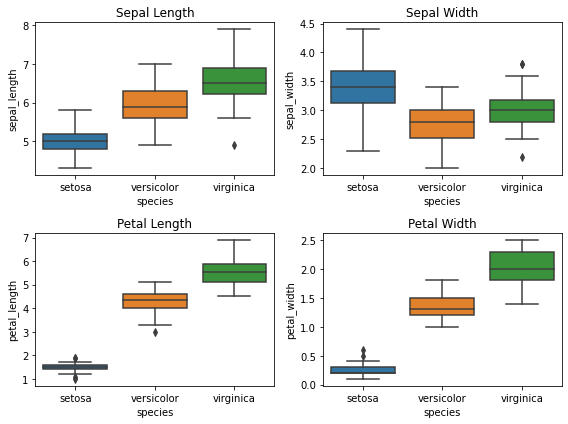

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x="species", y="sepal_length", data=df)
plt.title("Sepal Length")

plt.subplot(2, 2, 2)
sns.boxplot(x="species", y="sepal_width", data=df)
plt.title("Sepal Width")

plt.subplot(2, 2, 3)
sns.boxplot(x="species", y="petal_length", data=df)
plt.title("Petal Length")

plt.subplot(2, 2, 4)
sns.boxplot(x="species", y="petal_width", data=df)
plt.title("Petal Width")

plt.tight_layout()
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [54]:
X = df.drop('species', axis=1)
y = df['species']

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=24)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)


Ukuran X_train: (135, 4)
Ukuran X_test: (15, 4)
Ukuran y_train: (135,)
Ukuran y_test: (15,)


Lakukan fitur scaling pada variabel X_train dan X_test. 

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Logistic Regression

Bangun model dan ukur accuracy nya

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Akurasi Model:", accuracy)

Akurasi Model: 1.0


Uji model dengan dataset test

In [58]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print(y_pred)

['virginica' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'setosa'
 'virginica' 'virginica']


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Confusion Matrix:
[[6 0 0]
 [0 3 0]
 [0 0 6]]
Accuracy Score: 1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [60]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

Uji hasil model dengan data test

In [61]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(y_pred)

['virginica' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'setosa'
 'virginica' 'virginica']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [62]:
from sklearn.metrics import accuracy_score

y_pred = naive_bayes_model.predict(X_test_scaled)

confusion_mat = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_mat)
print("Akurasi Naive Bayes Classifier:", accuracy)

Confusion Matrix:
[[6 0 0]
 [0 3 0]
 [0 0 6]]
Akurasi Naive Bayes Classifier: 1.0


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(metric='euclidean')
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print(y_pred_knn)


['virginica' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'setosa'
 'virginica' 'virginica']


Ukur akurasi dari model K-Nearest Neighbor

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_mtx_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix KNN:")
print(confusion_mtx_knn)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nAkurasi Model KNN:", accuracy_knn)

Confusion Matrix KNN:
[[6 0 0]
 [0 3 0]
 [0 0 6]]

Akurasi Model KNN: 1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah accuracy model nya sama semua (1.0)